<a href="https://colab.research.google.com/github/minnjeee/SWcamp_3project_TextMining/blob/main/4_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 폰트 환경 설정

--2023-11-03 06:01:50--  https://github.com/byungjooyoo/Dataset/raw/main/NanumGothic.ttf
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/byungjooyoo/Dataset/main/NanumGothic.ttf [following]
--2023-11-03 06:01:50--  https://raw.githubusercontent.com/byungjooyoo/Dataset/main/NanumGothic.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4343844 (4.1M) [application/octet-stream]
Saving to: ‘NanumGothic.ttf’

NanumGothic.ttf     100%[===================>]   4.14M  --.-KB/s    in 0.08s   

2023-11-03 06:01:51 (52.0 MB/s) - ‘NanumGothic.ttf’ saved [4343844/4343844]



<Axes: title={'center': '한글'}>

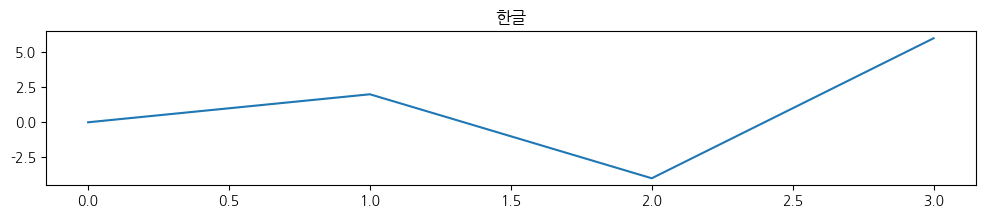

In [30]:
import matplotlib as mpl
import matplotlib.pyplot as plt
!wget https://github.com/byungjooyoo/Dataset/raw/main/NanumGothic.ttf
mpl.font_manager.fontManager.addfont('NanumGothic.ttf')
mpl.rc('font', family='NanumGothic')
plt.rc("axes", unicode_minus=False)

# 한글 폰트 확인하기
import pandas as pd
pd.Series([0,2,-4,6]).plot(title="한글", figsize=(12, 2))

# 라이브러리 임포트

In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import math
import pickle

In [3]:
from collections import Counter # 빈도 탐색
import nltk

# 텍스트 수치화 관련 라이브러리
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer # 정수 인코딩
from tensorflow.keras.preprocessing.sequence import pad_sequences # 패딩 작업

# 워드임베딩 관련 라이브러리
from gensim.models import Word2Vec
from gensim.models import FastText

# 시각화 관련 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from PIL import Image
from wordcloud import WordCloud

# 분석 관련 라이브러리
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

from sklearn.linear_model import LogisticRegression

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report

# 전처리, 라벨링한 데이터셋 불러오기

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SW캠프 데이터 비즈니스 과정/Re:Source/data_4label.csv')
data['pre'] = data['pre'].astype(str)
# 문자열로 저장된 리스트를 리스트 형태로 다시 저장하기
def tolist(string_token):
  return eval(string_token)
data['tok'] = data['tok'].apply(tolist)
data['no_ad'] = data['no_ad'].apply(tolist)
data['nouns'] = data['nouns'].apply(tolist)
data['all'] = data['all'].apply(tolist)

data

,name,star,date,content,utility,g_no,pre,tok,no_ad,nouns,all,score,weighted_sentiment,label
0,최유진,5,2023년 9월 6일,광고는 한판 할때마다 뜨긴하는데 꽤 괜찮은 게임입니다. 돈 모아서 어디쓰나 했더니 ...,98.0,1,광고는 한판 할 때마다 뜨긴 하는데 꽤 괜찮은 게임입니다돈 모아서 어디 쓰나 했더니...,"[(광고, Noun), (한판, Noun), (하다, Verb), (마다, Josa...","[광고, 한판, 괜찮다, 미기, 상대, 사람, 보기, 저런, 결과, 생각, 시반, ...","[광고, 한판, 미기, 상대, 사람, 보기, 저런, 결과, 생각, 시반, 소리, 고...","[광고, 한판, 하다, 마다, 뜨다, 하다, 괜찮다, 모으다, 쓰다, 하다, 꾸다,...",3.725,4.929,1
1,김세희,5,2023년 9월 10일,광고봐서 내용만 재밌는 그런게임인줄 알았는데 재밌네요,47.0,1,광고 봐서 내용만 재밌는 그런 게임인 줄 알았는데 재밌네요,"[(광고, Noun), (보다, Verb), (내용, Noun), (재밌다, Adj...","[광고, 내용, 재밌다, 재밌다]","[광고, 내용]","[광고, 보다, 내용, 재밌다, 알다, 재밌다]",2.150,3.606,1
2,정희원,5,2023년 10월 2일,너무 재밌고 꾸미는 재미가 있어요!,4.0,1,너무 재밌고 꾸미는 재미가 있어요,"[(너무, Adverb), (재밌다, Adjective), (꾸미다, Verb), ...","[재밌다, 재미]",[재미],"[너무, 재밌다, 꾸미다, 재미]",1.250,2.850,1
3,이지윤,5,2023년 10월 7일,님들도 헤봐용 너무 제밌고 웃께용 👍 따봉,0.0,1,님들도 헤봐용 너무 재밌고 웃께 용 따봉,"[(님들, Noun), (헤봐용, Noun), (너무, Adverb), (재밌다, ...","[님들, 헤봐용, 재밌다]","[님들, 헤봐용]","[님들, 헤봐용, 너무, 재밌다, 따다]",0.850,2.095,1
4,김땅콩,1,2023년 9월 19일,전형적인 양산형 최악의 게임 입니다.,20.0,1,전형적인 양산형 최악의 게임입니다,"[(전형, Noun), (양산, Noun), (최악, Noun)]","[전형, 양산, 최악]","[전형, 양산, 최악]","[전형, 양산, 최악]",-0.500,-0.060,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38541,강정미,5,2022년 2월 21일,꿀밤,3.0,45,꿀밤,"[(꿀밤, Noun)]",[꿀밤],[꿀밤],[꿀밤],0.000,1.800,1
38542,바보,4,2022년 2월 27일,Please reduce ads 😭😭🙄🙁😶,2.0,45,광고를 줄이십시오,"[(광고, Noun), (줄이다, Verb)]",[광고],[광고],"[광고, 줄이다]",0.000,1.440,0
38543,byungchul han,5,2022년 8월 7일,회생 후.,0.0,45,회생 후,"[(회생, Noun)]",[회생],[회생],[회생],0.000,1.500,0
38544,날아라슈퍼보드팬크레용팝팬,4,2022년 2월 27일,아진짜.,3.0,45,아 진짜,[],[],[],[],0.000,1.440,0


In [ ]:
# data['pre'] = data['pre'].str.replace('나 잼', '노잼')

# 리뷰 전체 데이터셋 가져와서 전처리된 데이터 매핑

In [ ]:
reviews_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SW캠프 데이터 비즈니스 과정/Re:Source/reviews.csv')

In [ ]:
reviews_df

,name,star,date,content,utility,g_no
0,최유진,5,2023년 9월 6일,광고는 한판 할때마다 뜨긴하는데 꽤 괜찮은 게임입니다. 돈 모아서 어디쓰나 했더니 ...,98.0,1
1,김세희,5,2023년 9월 10일,광고봐서 내용만 재밌는 그런게임인줄 알았는데 재밌네요,47.0,1
2,정희원,5,2023년 10월 2일,너무 재밌고 꾸미는 재미가 있어요!,4.0,1
3,이지윤,5,2023년 10월 7일,님들도 헤봐용 너무 제밌고 웃께용 👍 따봉,NaN,1
4,김땅콩,1,2023년 9월 19일,전형적인 양산형 최악의 게임 입니다.,20.0,1
...,...,...,...,...,...,...
42591,날아라슈퍼보드팬크레용팝팬,4,2022년 2월 27일,아진짜.,3.0,45
42592,이대부,5,2022년 2월 25일,ㅓㅕㅍ셔ㅛㅛ,2.0,45
42593,Google 사용자,5,2022년 2월 28일,재밌다,2.0,45
42594,허주환,1,2022년 3월 22일,노잼,0.0,45


In [ ]:
review = pd.merge(reviews_df, data[['content','pre','tok','no_ad','nouns','all','label']], how = 'left', left_on= 'content', right_on= 'content')

In [ ]:
review[review['pre'].isnull()]

,name,star,date,content,utility,g_no,pre,tok,no_ad,nouns,all,label
23,신신애,5,2023년 9월 10일,🥰,1.0,1,NaN,NaN,NaN,NaN,NaN,NaN
707,nari Jang,5,2021년 10월 10일,🎹🎹🎹🎹🎹🎹🎹📯📣🎤🎶,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN
719,황오깡공주,5,2021년 7월 19일,👍👍👍👍👍👍👍👍👍👍👍👍,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN
743,MEIXIANG PIAO,1,2021년 2월 19일,👎,4.0,2,NaN,NaN,NaN,NaN,NaN,NaN
768,감선화,1,2023년 7월 9일,🤬🤬🤬🤬🇰🇷🇰🇷🇰🇷🇰🇷🇰🇷🤬🥢🤬🤬🤬🤬🤬🤬🤬🤬,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
42556,신경옥,5,2022년 8월 25일,😀,0.0,45,NaN,NaN,NaN,NaN,NaN,NaN
42563,양은정,5,2022년 5월 9일,👍,0.0,45,NaN,NaN,NaN,NaN,NaN,NaN
42573,AITV쥬피터타임 AITVJupiterTime AITV,5,2022년 7월 18일,have 😁,0.0,45,NaN,NaN,NaN,NaN,NaN,NaN
42580,박정현,5,2022년 3월 5일,👍,0.0,45,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
review.to_csv('/content/drive/MyDrive/Colab Notebooks/SW캠프 데이터 비즈니스 과정/Re:Source/data_5review.csv', index=False)

In [18]:
review = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SW캠프 데이터 비즈니스 과정/Re:Source/data_5review.csv')

# 모델과 토크나이저 불러오기

In [19]:
# 정확도 가장 높은 모델 불러오기
best_model = load_model('/content/drive/MyDrive/Colab Notebooks/SW캠프 데이터 비즈니스 과정/Re:Source/model/bilstm7_010_0.9090.hdf5')

# 저장된 Tokenizer 불러오기
with open('/content/drive/MyDrive/Colab Notebooks/SW캠프 데이터 비즈니스 과정/Re:Source/tokenizer/tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [20]:
review1 = review[review['pre'].isnull()] # 전처리된 텍스트가 비어있는 경우
review2 = review[review['pre'].notna()] # 비어있지 않은 경우

In [21]:
tqdm.pandas()  # tqdm의 pandas 기능을 활성화

# 전처리 텍스트가 비어있는 경우, 평점을 기준으로 감성 점수 부여
def star_predict(star):
  return star*0.2

review1['y_pred'] = review1['star'].progress_apply(star_predict)
review1

100%|██████████| 199/199 [00:00<00:00, 192053.96it/s]
<ipython-input-21-4476c2a385a1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review1['y_pred'] = review1['star'].progress_apply(star_predict)


,name,star,date,content,utility,g_no,pre,tok,no_ad,nouns,all,label,y_pred
23,신신애,5,2023년 9월 10일,🥰,1.0,1,NaN,NaN,NaN,NaN,NaN,NaN,1.0
707,nari Jang,5,2021년 10월 10일,🎹🎹🎹🎹🎹🎹🎹📯📣🎤🎶,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,1.0
719,황오깡공주,5,2021년 7월 19일,👍👍👍👍👍👍👍👍👍👍👍👍,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,1.0
743,MEIXIANG PIAO,1,2021년 2월 19일,👎,4.0,2,NaN,NaN,NaN,NaN,NaN,NaN,0.2
768,감선화,1,2023년 7월 9일,🤬🤬🤬🤬🇰🇷🇰🇷🇰🇷🇰🇷🇰🇷🤬🥢🤬🤬🤬🤬🤬🤬🤬🤬,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42556,신경옥,5,2022년 8월 25일,😀,0.0,45,NaN,NaN,NaN,NaN,NaN,NaN,1.0
42563,양은정,5,2022년 5월 9일,👍,0.0,45,NaN,NaN,NaN,NaN,NaN,NaN,1.0
42573,AITV쥬피터타임 AITVJupiterTime AITV,5,2022년 7월 18일,have 😁,0.0,45,NaN,NaN,NaN,NaN,NaN,NaN,1.0
42580,박정현,5,2022년 3월 5일,👍,0.0,45,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [23]:
# 전처리 텍스트가 비어있지 않은 경우
def tolist(string_token):
  return eval(string_token)
review2['tok'] = review2['tok'].apply(tolist)
review2['no_ad'] = review2['no_ad'].apply(tolist)
review2['nouns'] = review2['nouns'].apply(tolist)
review2['all'] = review2['all'].apply(tolist)

# 모델링 시 학습시켰던 토크나이저로 토큰들을 시퀀스, 패딩 처리 적용
seq = tokenizer.texts_to_sequences(review2['all'])
pad = pad_sequences(seq, maxlen=110)
# 정확도가 가장 높았던 모델을 이용해 감정 분류 확률 구함
review2['y_pred'] = best_model.predict(pad)
review2

<ipython-input-23-1c7a462c0f55>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review2['tok'] = review2['tok'].apply(tolist)
<ipython-input-23-1c7a462c0f55>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review2['no_ad'] = review2['no_ad'].apply(tolist)
<ipython-input-23-1c7a462c0f55>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

1325/1325 [==============================] - 149s 113ms/step


<ipython-input-23-1c7a462c0f55>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review2['y_pred'] = best_model.predict(pad)


,name,star,date,content,utility,g_no,pre,tok,no_ad,nouns,all,label,y_pred
0,최유진,5,2023년 9월 6일,광고는 한판 할때마다 뜨긴하는데 꽤 괜찮은 게임입니다. 돈 모아서 어디쓰나 했더니 ...,98.0,1,광고는 한판 할 때마다 뜨긴 하는데 꽤 괜찮은 게임입니다돈 모아서 어디 쓰나 했더니...,"[(광고, Noun), (한판, Noun), (하다, Verb), (마다, Josa...","[광고, 한판, 괜찮다, 미기, 상대, 사람, 보기, 저런, 결과, 생각, 시반, ...","[광고, 한판, 미기, 상대, 사람, 보기, 저런, 결과, 생각, 시반, 소리, 고...","[광고, 한판, 하다, 마다, 뜨다, 하다, 괜찮다, 모으다, 쓰다, 하다, 꾸다,...",1.0,0.999959
1,김세희,5,2023년 9월 10일,광고봐서 내용만 재밌는 그런게임인줄 알았는데 재밌네요,47.0,1,광고 봐서 내용만 재밌는 그런 게임인 줄 알았는데 재밌네요,"[(광고, Noun), (보다, Verb), (내용, Noun), (재밌다, Adj...","[광고, 내용, 재밌다, 재밌다]","[광고, 내용]","[광고, 보다, 내용, 재밌다, 알다, 재밌다]",1.0,0.999702
2,정희원,5,2023년 10월 2일,너무 재밌고 꾸미는 재미가 있어요!,4.0,1,너무 재밌고 꾸미는 재미가 있어요,"[(너무, Adverb), (재밌다, Adjective), (꾸미다, Verb), ...","[재밌다, 재미]",[재미],"[너무, 재밌다, 꾸미다, 재미]",1.0,0.994617
3,이지윤,5,2023년 10월 7일,님들도 헤봐용 너무 제밌고 웃께용 👍 따봉,NaN,1,님들도 헤봐용 너무 재밌고 웃께 용 따봉,"[(님들, Noun), (헤봐용, Noun), (너무, Adverb), (재밌다, ...","[님들, 헤봐용, 재밌다]","[님들, 헤봐용]","[님들, 헤봐용, 너무, 재밌다, 따다]",1.0,0.982995
4,김땅콩,1,2023년 9월 19일,전형적인 양산형 최악의 게임 입니다.,20.0,1,전형적인 양산형 최악의 게임입니다,"[(전형, Noun), (양산, Noun), (최악, Noun)]","[전형, 양산, 최악]","[전형, 양산, 최악]","[전형, 양산, 최악]",0.0,0.000351
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42591,날아라슈퍼보드팬크레용팝팬,4,2022년 2월 27일,아진짜.,3.0,45,아 진짜,[],[],[],[],0.0,0.028012
42592,이대부,5,2022년 2월 25일,ㅓㅕㅍ셔ㅛㅛ,2.0,45,ㅓㅕㅍ셔ㅛㅛ,"[(ㅓㅕㅍ, KoreanParticle), (ㅛㅛ, KoreanParticle)]",[],[],"[ㅓㅕㅍ, ㅛㅛ]",0.0,0.145615
42593,Google 사용자,5,2022년 2월 28일,재밌다,2.0,45,재밌다,"[(재밌다, Adjective)]",[재밌다],[],[재밌다],1.0,0.956808
42594,허주환,1,2022년 3월 22일,노잼,0.0,45,노잼,"[(노잼, Noun)]",[노잼],[노잼],[노잼],0.0,0.000285


In [24]:
# 전처리 비어있는 경우와 비어있지 않은 경우의 df를 다시 합치기
review = pd.concat([review1,review2])

In [25]:
# 감성점수(분류확률)을 기준으로 0.5보다 크면 긍정, 작으면 부정
review['y_lable'] = (review['y_pred'] > 0.5).astype(int)

review

,name,star,date,content,utility,g_no,pre,tok,no_ad,nouns,all,label,y_pred,y_lable
23,신신애,5,2023년 9월 10일,🥰,1.0,1,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1
707,nari Jang,5,2021년 10월 10일,🎹🎹🎹🎹🎹🎹🎹📯📣🎤🎶,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1
719,황오깡공주,5,2021년 7월 19일,👍👍👍👍👍👍👍👍👍👍👍👍,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1
743,MEIXIANG PIAO,1,2021년 2월 19일,👎,4.0,2,NaN,NaN,NaN,NaN,NaN,NaN,0.200000,0
768,감선화,1,2023년 7월 9일,🤬🤬🤬🤬🇰🇷🇰🇷🇰🇷🇰🇷🇰🇷🤬🥢🤬🤬🤬🤬🤬🤬🤬🤬,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,0.200000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42591,날아라슈퍼보드팬크레용팝팬,4,2022년 2월 27일,아진짜.,3.0,45,아 진짜,[],[],[],[],0.0,0.028012,0
42592,이대부,5,2022년 2월 25일,ㅓㅕㅍ셔ㅛㅛ,2.0,45,ㅓㅕㅍ셔ㅛㅛ,"[(ㅓㅕㅍ, KoreanParticle), (ㅛㅛ, KoreanParticle)]",[],[],"[ㅓㅕㅍ, ㅛㅛ]",0.0,0.145615,0
42593,Google 사용자,5,2022년 2월 28일,재밌다,2.0,45,재밌다,"[(재밌다, Adjective)]",[재밌다],[],[재밌다],1.0,0.956808,1
42594,허주환,1,2022년 3월 22일,노잼,0.0,45,노잼,"[(노잼, Noun)]",[노잼],[노잼],[노잼],0.0,0.000285,0


In [26]:
# 감정 분류된 결과 개수 확인
print(sum(review['y_lable'] == 1))
print(sum(review['y_lable'] == 0))

21843
20753


In [27]:
# 리뷰 작성일(date필드)의 형식을 'yyyy년 mm월 dd일' -> 'yyyy-mm-dd' 로 변
review['date'] = review['date'].str.replace('년 ', '-')
review['date'] = review['date'].str.replace('월 ', '-')
review['date'] = review['date'].str.replace('일', '')
review['date'] = pd.to_datetime(review['date'])
review

,name,star,date,content,utility,g_no,pre,tok,no_ad,nouns,all,label,y_pred,y_lable
23,신신애,5,2023-09-10,🥰,1.0,1,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1
707,nari Jang,5,2021-10-10,🎹🎹🎹🎹🎹🎹🎹📯📣🎤🎶,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1
719,황오깡공주,5,2021-07-19,👍👍👍👍👍👍👍👍👍👍👍👍,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1
743,MEIXIANG PIAO,1,2021-02-19,👎,4.0,2,NaN,NaN,NaN,NaN,NaN,NaN,0.200000,0
768,감선화,1,2023-07-09,🤬🤬🤬🤬🇰🇷🇰🇷🇰🇷🇰🇷🇰🇷🤬🥢🤬🤬🤬🤬🤬🤬🤬🤬,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,0.200000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42591,날아라슈퍼보드팬크레용팝팬,4,2022-02-27,아진짜.,3.0,45,아 진짜,[],[],[],[],0.0,0.028012,0
42592,이대부,5,2022-02-25,ㅓㅕㅍ셔ㅛㅛ,2.0,45,ㅓㅕㅍ셔ㅛㅛ,"[(ㅓㅕㅍ, KoreanParticle), (ㅛㅛ, KoreanParticle)]",[],[],"[ㅓㅕㅍ, ㅛㅛ]",0.0,0.145615,0
42593,Google 사용자,5,2022-02-28,재밌다,2.0,45,재밌다,"[(재밌다, Adjective)]",[재밌다],[],[재밌다],1.0,0.956808,1
42594,허주환,1,2022-03-22,노잼,0.0,45,노잼,"[(노잼, Noun)]",[노잼],[노잼],[노잼],0.0,0.000285,0


In [ ]:
review.to_csv('/content/drive/MyDrive/Colab Notebooks/SW캠프 데이터 비즈니스 과정/Re:Source/data_6ypred.csv', index=False)

# tf-idf 벡터화를 통해, 중요한 단어를 추출하여 워드클라우드 시각화

In [33]:
# TF-IDF 벡터화 학습시키기
token = review[(review['no_ad'].notna())]['no_ad'] # 전처리된 리뷰들의 명사와 형용사인 토큰
corpus = [*map(lambda x: ' '.join(x) , token)]  # 토큰들을 하나의 코퍼스로 합치기
tfidfv = TfidfVectorizer(min_df=1).fit(corpus)  # 코퍼스를 tf_idf 벡터화

def tfidf_vector(no, emotion):
  token = review[(review['y_lable']==emotion)&(review['g_no']==no)&(review['no_ad'].notna())]['no_ad'] # 전처리된 리뷰들의 명사와 형용사인 토큰
  corpus = [*map(lambda x: ' '.join(x) , token)]  # 토큰들을 하나의 코퍼스로 합치기

  tfidfv_matrix = tfidfv.transform(corpus).toarray() # tf_idf 벡터

  index_word = {idx:word for (word,idx) in tfidfv.vocabulary_.items()} # bow (인덱스, 토큰)
  tfidfv_sum = tfidfv_matrix.sum(axis=0) # 각 토큰들의 언급된 횟수

  frequencies = {index_word[i]:tfidfv_sum[i] for i in range(len(tfidfv.vocabulary_))}  # (토큰:횟수)
  return frequencies

# 각 게임의 긍정 또는 부정 리뷰의 워드클라우드
def wordcloud(no, emotion):  # (게임순위, 감정)
  frequencies = tfidf_vector(no, emotion)

  if emotion == 1 :
      color = 'spring'
  else :
      color = 'winter'

  # 워드클라우드 생성
  wordcloud = WordCloud(font_path='/content/NanumGothic.ttf',
                        relative_scaling = 0.2,
                        background_color='white',
                        width = 800,
                        height = 800,
                        colormap=color,
                        contour_width=1,
                        contour_color='red'
                        ).generate_from_frequencies(frequencies)

  plt.figure(figsize=(10, 6))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

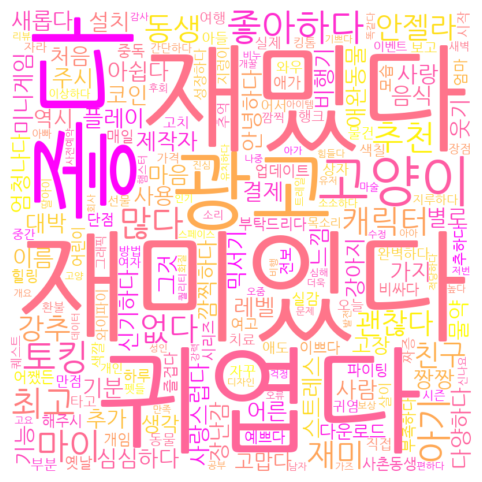

In [34]:
# 15위 게임의 긍정 워드클라우드
wordcloud(15, 1)

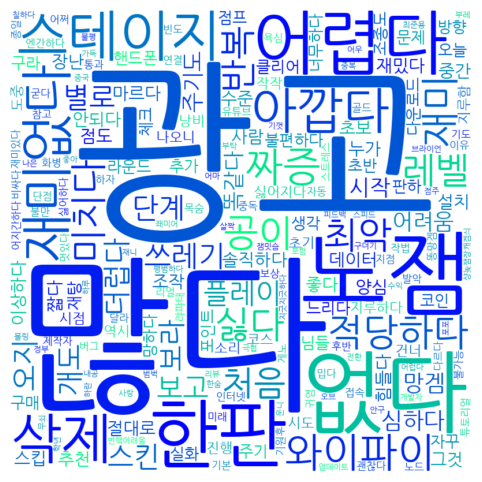

In [35]:
# 2위 게임의 부정 워드클라우드
wordcloud(2, 0)

In [ ]:
date2 = review2[['date','y_pred']]

date2['date'] = date2['date'].str.replace('년 ', '-')
date2['date'] = date2['date'].str.replace('월 ', '-')
date2['date'] = date2['date'].str.replace('일', '')
date2['date'] = pd.to_datetime(date2['date'])



<ipython-input-34-2711154582c3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date2['date'] = date2['date'].str.replace('년 ', '-')
<ipython-input-34-2711154582c3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date2['date'] = date2['date'].str.replace('월 ', '-')
<ipython-input-34-2711154582c3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

In [ ]:
date_avg

date
2021-02-17    0.044302
2021-02-18    0.044665
2021-02-19    0.043955
2021-02-20    0.051401
2021-02-21    0.035271
                ...   
2023-09-25    0.028714
2023-09-26    0.007569
2023-09-28    0.008225
2023-10-02    0.028499
2023-10-03    0.015773
Name: y_pred, Length: 456, dtype: float32

In [ ]:
date_avg.index

DatetimeIndex(['2021-02-17', '2021-02-18', '2021-02-19', '2021-02-20',
               '2021-02-21', '2021-02-22', '2021-02-23', '2021-02-25',
               '2021-02-26', '2021-02-27',
               ...
               '2023-09-09', '2023-09-10', '2023-09-14', '2023-09-15',
               '2023-09-17', '2023-09-25', '2023-09-26', '2023-09-28',
               '2023-10-02', '2023-10-03'],
              dtype='datetime64[ns]', name='date', length=456, freq=None)

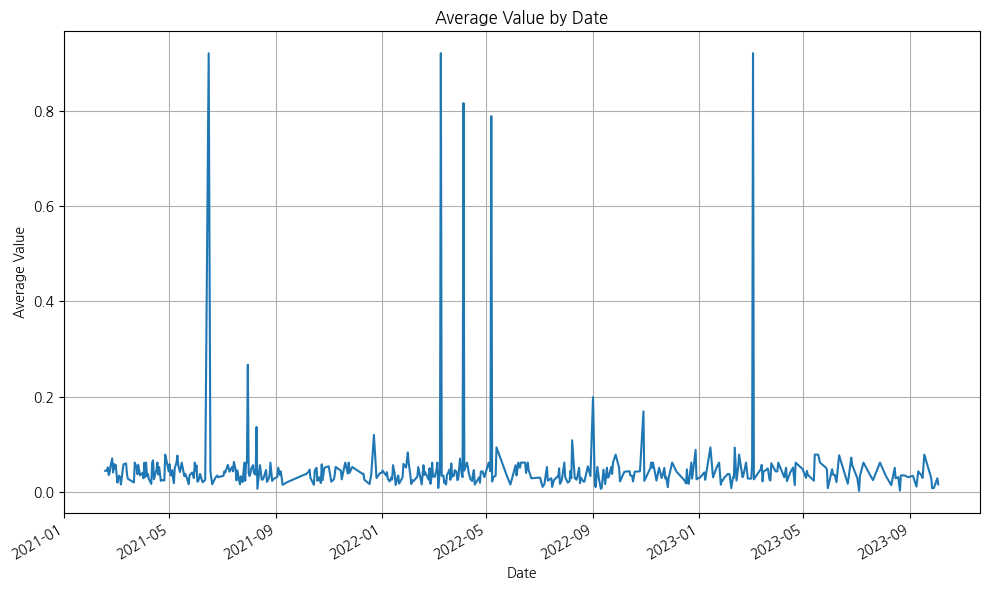

In [ ]:
# 날짜별로 평균 계산
date_avg = date2.groupby('date')['y_pred'].mean()

# 그래프 그리기
plt.figure(figsize=(10,6))
date_avg.plot(kind='line')
plt.title('Average Value by Date')
plt.xlabel('Date')
plt.ylabel('Average Value')
plt.grid(True)
plt.tight_layout()
plt.show()

# 시간흐름에 따른 감점 추이 선 그래프

In [37]:
def line_chart(no, kind):
  line_df = review[(review['g_no']==no)&(review['no_ad'].notna())][['date','y_lable']]
  line_df.reset_index(drop=True, inplace=True)

  line_df1 = pd.crosstab(index=line_df['date'], columns=line_df['y_lable'], rownames=['date'], colnames=['y_lable'], margins=False)
  line_df1.reset_index(inplace=True)

  # 날짜별로 평균 계산
  date_avg = review[review['g_no']==no].groupby('date')['y_pred'].mean()

  if kind == 1 :
    return line_df1['date'].tolist(), line_df1[0].tolist(), line_df1[1].tolist()
  elif kind == 2 :
    return date_avg

def emotional_score_line(no):
  date_avg = line_chart(no,2)

  # 그래프 그리기
  plt.figure(figsize=(10,6))
  date_avg.plot(kind='line')
  plt.title('Average Value by Date')
  plt.xlabel('Date')
  plt.ylabel('Average Value')
  plt.grid(True)
  plt.tight_layout()
  plt.show()

def classification_trend_line(no):
  date, neg, pos = line_chart(no,1)
  # 그래프 그리기
  plt.figure(figsize=(10, 6))
  plt.plot(date, neg, linestyle='-', label="부정")
  plt.plot(date, pos, linestyle='-', label="긍정")

  # 날짜 눈금 레이블 회전
  plt.xticks(rotation=45)

  # 그래프 표시
  plt.legend()
  plt.show()

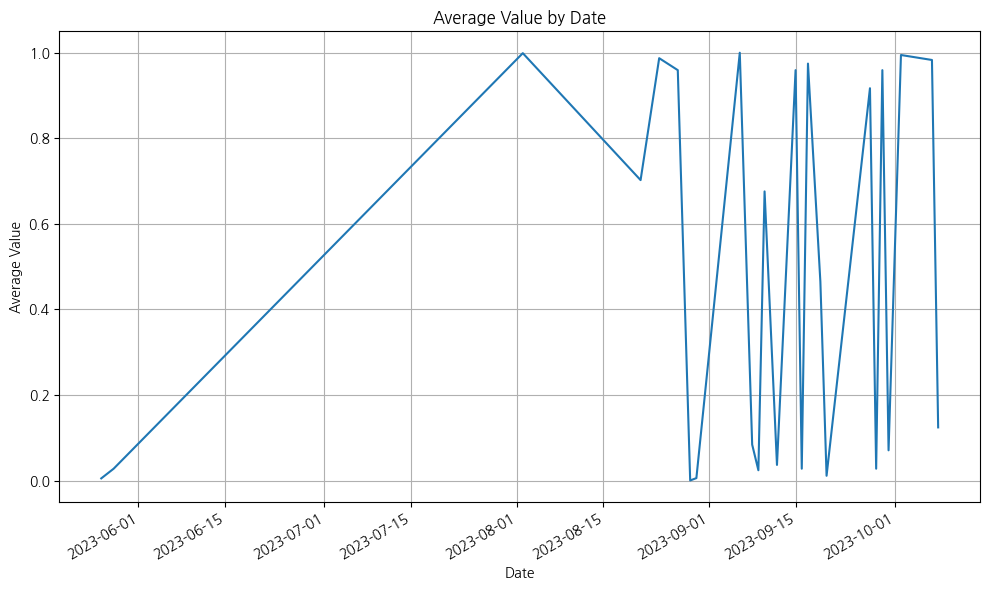

In [38]:
# 1위 게임의 시간흐름에 따른 감성 점수 그래프
emotional_score_line(1)

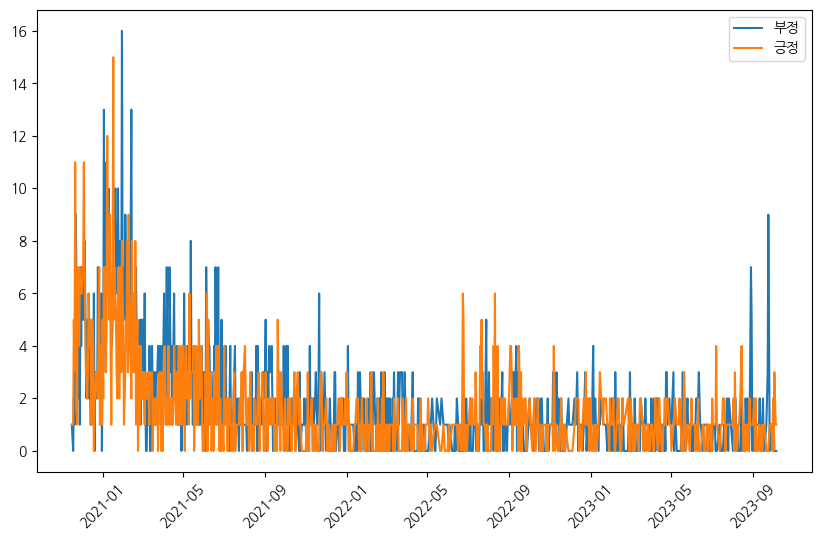

In [40]:
# 40위 게임의 시간흐름에 따른 긍정/부정 수 그래프
classification_trend_line(40)

## 레이터 차트

In [43]:
# top5의 부정 키워드
nouns = review[(review['y_lable']==0)&(review['g_no']<=5)&(review['nouns'].notna())]['nouns']
noun_list = []
for noun in nouns:
    noun_list.extend(noun)
countTopNeg = Counter(noun_list)

# top5의 긍정 키워드
nouns = review[(review['y_lable']==1)&(review['g_no']<=5)&(review['nouns'].notna())]['nouns']
noun_list = []
for noun in nouns:
    noun_list.extend(noun)
countTopPos = Counter(noun_list)

def rader_chart_data(no, emotion):
  if emotion == 1:
    countTop = countTopPos
  else :
    countTop = countTopNeg

  nouns = review[(review['y_lable']==emotion)&(review['g_no']==no)&(review['nouns'].notna())]['nouns']
  noun_list = []
  for noun in nouns:
    noun_list.extend(noun)
  count = Counter(noun_list)

  key=[]; value=[]; value2=[]
  for k, v in count.most_common(6) :
    key.append(k)
    value.append(v)
    value2.append(countTop[k] * len(review[review['g_no']==no])/len(review[review['g_no']<=5]))

  return key, value, value2


def review_rader(no, emotion):
  if emotion == 0:
    color = 'violet'
    emo = '부정'
  else:
    color = 'pink'
    emo = '긍정'


  key, value, value2 = rader_chart_data(no, emotion)
  value.append(value[0])
  value2.append(value2[0])

  # 원형 레이더 차트를 그리기 위한 각도 설정
  angles = np.linspace(0, 2 * np.pi, len(key), endpoint=False).tolist()
  angles += angles[:1]  # 시작과 끝을 연결하여 원형 레이더 차트 생성

  # 레이더 차트의 값 표시
  plt.figure(figsize=(6, 6)) # 그래프의 크기 설정
  ax = plt.subplot(111, polar=True) # 레이더 차트의 축 생성
  ax.set_xticks(angles[:-1])  # 카테고리 레이블 각도 설정
  ax.set_xticklabels(key)  # 카테고리 레이블 설정
  ax.set_yticklabels([])  # y 축 레이블 숨김

  ax.fill(angles, value, color, alpha=0.5)   # top5 게임의 데이터 값으로 영역을 채우기
  if no != 0 :
    ax.fill(angles, value2, 'yellow', alpha=0.5)  # 해당 게임의 데이터 값으로 영역을 채우기

  # 레이더 차트 제목 설정
  plt.title(f'{no}위 게임의 {emo} 핵심 키워드', size=20, color='gray', y=1.1)
  plt.show()

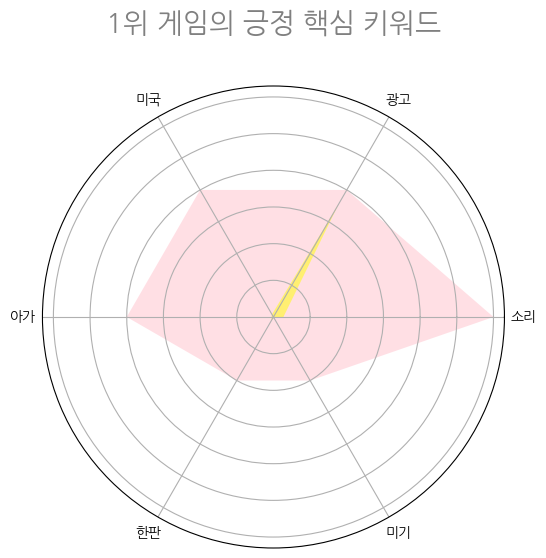

In [44]:
# 1위 게임의 긍정 핵심 키워드
review_rader(1,1)